**연속형 data ensemble**
- BaggingRegressor : Bootstrap + Arregating
- KNeighborsRegressor
- RandomForest Regressor
- AdaBoost Regressor

In [1]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
# read data
df = pd.read_csv('C:/Users/gmlkd/data/data02_diabetes.csv')
X = df.iloc[:,:-1]
y = df['Y']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=1)

In [3]:
xtrain

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
100,0.016281,-0.044642,0.017506,-0.022885,0.060349,0.044406,0.030232,-0.002592,0.037232,-0.001078
34,0.016281,-0.044642,-0.063330,-0.057314,-0.057983,-0.048912,0.008142,-0.039493,-0.059473,-0.067351
188,0.005383,-0.044642,-0.002973,0.049415,0.074108,0.070710,0.044958,-0.002592,-0.001499,-0.009362
110,0.041708,0.050680,-0.032073,-0.022885,-0.049727,-0.040144,0.030232,-0.039493,-0.126097,0.015491
175,0.067136,-0.044642,-0.038540,-0.026328,-0.031840,-0.026366,0.008142,-0.039493,-0.027129,0.003064
...,...,...,...,...,...,...,...,...,...,...
255,0.001751,-0.044642,-0.065486,-0.005671,-0.007073,-0.019476,0.041277,-0.039493,-0.003304,0.007207
72,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084495,-0.017646
396,-0.085430,0.050680,-0.030996,-0.022885,-0.063487,-0.054236,0.019187,-0.039493,-0.096433,-0.034215
235,0.067136,0.050680,-0.014828,0.058596,-0.059359,-0.034508,-0.061809,0.012906,-0.005145,0.048628


### Bagging Methods

In [4]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [5]:
# usual knn
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(xtrain, ytrain)
print(knn.score(xtrain, ytrain), knn.score(xtest, ytest))

# score는 R-square값
# testset에 대해 0.3

0.6447443202247629 0.30194445005036563


In [6]:
# full bagging
# 100개의 KNN을 ensemble한다.
# max_sampes=1.0 : 전체 데이터를 학습시킨다.
# max_features=1.0 : feature를 모두 사용한다.

bf = BaggingRegressor(knn, n_estimators=100, max_samples=1.0, max_features=1.0, random_state=0) 
bf.fit(xtrain, ytrain)
print(bf.score(xtrain, ytrain), bf.score(xtest, ytest))

# score는 R-square값
# 그냥 KNN보다는 test score가 조금 더 올랐다

0.673701636213444 0.34106207785208675


In [8]:
# bagging with subsampling and feature randomization
bf = BaggingRegressor(knn, n_estimators=100, max_samples=0.5, max_features=0.5, random_state=0)
bf.fit(xtrain, ytrain)
print(bf.score(xtrain, ytrain), bf.score(xtest, ytest))

# 절반의 samples와 feature만 뽑으니 성능이 좋아졌다 -> 다양한 경우의 수를 교차검증할 수 있기 때문

0.5801532018029003 0.36337966190846294


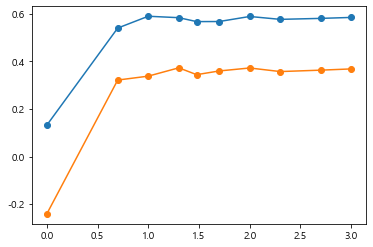

In [9]:
# effect of estimators
np.random.seed(0)
n_list = [1,5,10,20,30,50,100,200,500,1000]
s = np.zeros((len(n_list),2))
for i in range(len(n_list)):
    bf = BaggingRegressor(knn, n_estimators=n_list[i], max_samples=0.5, max_features=0.5)
    bf.fit(xtrain, ytrain)
    s[i,0] = bf.score(xtrain,ytrain)
    s[i,1] = bf.score(xtest,ytest)
plt.plot(np.log10(n_list),s,marker='o')

In [12]:
# parameter tunning
np.random.seed(1)
params = np.arange(2,20,2)
s = np.zeros((len(params),3))
for i in range(len(params)):
    f = BaggingRegressor(KNeighborsRegressor(params[i]), n_estimators=200,
                          random_state=0, max_samples=0.5, max_features=0.5, oob_score=True)
    f.fit(xtrain, ytrain)
    s[i,0] = f.score(xtrain, ytrain)
    s[i,1] = cross_val_score(f,xtrain, ytrain, cv=5).mean()
    s[i,2] = f.score(xtest, ytest)

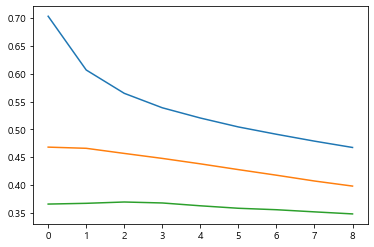

In [13]:
plt.plot(s)

### Random Forest Regressor

In [14]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(xtrain, ytrain)
yhat_test = rf.predict(xtest)
print(rf.score(xtrain, ytrain), rf.score(xtest, ytest))

0.9344222892222186 0.26652306720579266


In [15]:
# number of features to be chosen
# max_features='sqrt': feature 개수에 루트를 씌움
# 아래 tree size에 대한 training과 비교해서 test가 높지만 train이 낮은걸 보면 overfitting은 아닐 것이다.
rf = RandomForestRegressor(n_estimators=100, random_state=0, max_features='sqrt')
rf.fit(xtrain,ytrain)
print(rf.score(xtrain,ytrain), rf.score(xtest,ytest))

0.9307158003923464 0.32452479852142846


In [16]:
# tree size
rf = RandomForestRegressor(n_estimators=100, random_state=0,
                           max_features='sqrt', max_leaf_nodes=100)
rf.fit(xtrain,ytrain)
print(rf.score(xtrain, ytrain), rf.score(xtest, ytest))

0.934844542444828 0.3186232382873758


#### 참고
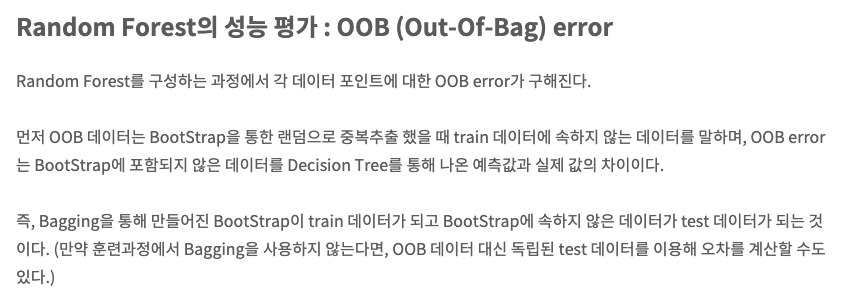

In [17]:
# oob score
rf = RandomForestRegressor(n_estimators=100,random_state=0,
                           max_features='sqrt',max_leaf_nodes=100,
                           oob_score=True)
rf.fit(xtrain,ytrain)
print(rf.score(xtrain,ytrain), rf.score(xtest,ytest))
print(rf.oob_score_)  # out-of-bag score

# oob_score가 낮아질 수록 각 트리들이 학습을 잘하는 것이다.

0.934844542444828 0.3186232382873758
0.5286735733070282


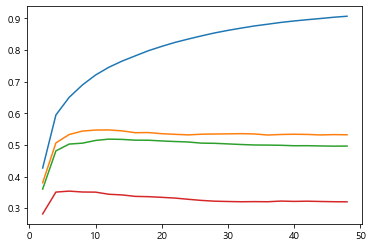

In [18]:
# parameter tuning using oob scores
tree_size = np.arange(2, 50, 2)
s = np.zeros((len(tree_size),4))

for i in range(len(tree_size)):
    rf = RandomForestRegressor(n_estimators=100, random_state=0,
                           max_features='sqrt', max_leaf_nodes=tree_size[i],
                           oob_score=True)
    rf.fit(xtrain,ytrain)
    s[i,0] = rf.score(xtrain,ytrain)
    s[i,1] = rf.oob_score_ 
    s[i,2] = cross_val_score(rf,xtrain,ytrain,cv=5).mean()
    s[i,3] = rf.score(xtest,ytest)

plt.plot(tree_size, s)

# 6~8 정도가 이상적인 tree size

### AdaBoost

- [참고](http://www.incodom.kr/Adaboost)
- boosting: 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 기계학습 방식
- 예측 성능이 조금 낮은 약한 학습기(weak classifier)를 다량 구축 및 조합하여 가중치 수정을 통해 좀 더 나은 성능을 발휘하는 하나의 강한 분류기(strong classifier)를 합성하는 방법
- 학습 데이터에 과적합(overfitting) 현상이 적게 발생하여 예측 성능을 저하하지 않는 장점

In [20]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=20)

In [21]:
# usual knn
knn.fit(xtrain,ytrain)
print(knn.score(xtrain,ytrain), knn.score(xtest,ytest))

0.5080959725354963 0.3876364359427341


In [22]:
# adaboost with knn
f = AdaBoostRegressor(knn, n_estimators=20, learning_rate=1, random_state=0)
f.fit(xtrain,ytrain)
print(f.score(xtrain,ytrain), f.score(xtest,ytest))

0.5241872608426615 0.38040938090239296


In [25]:
# adaboost with tree
f = AdaBoostRegressor(None, n_estimators=10, learning_rate=1, random_state=0)
f.fit(xtrain,ytrain)
print(f.score(xtrain,ytrain), f.score(xtest,ytest))

# KNN이 더 낫다.

0.7099696568895637 0.31983289991227004


### GridSearch

In [26]:
# parameter tuning
from sklearn.model_selection import GridSearchCV
model = AdaBoostRegressor()
parameters = {
    'base_estimator': [knn, None],
    'n_estimators': np.arange(2,200,2)
    }
f = GridSearchCV(model,parameters,cv=3)
f.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(),
             param_grid={'base_estimator': [KNeighborsRegressor(n_neighbors=20),
                                            None],
                         'n_estimators': array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104,
       106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130,
       132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156,
       158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182,
       184, 186, 188, 190, 192, 194, 196, 198])})

In [29]:
print(f.best_params_)
print(f.best_score_)
print(f.best_estimator_)

{'base_estimator': None, 'n_estimators': 16}
0.48222290773467097
AdaBoostRegressor(n_estimators=16)


In [30]:
print(f.score(xtrain, ytrain), f.score(xtest, ytest))

0.7267546488103471 0.2579615256474247
